# 一、内积

设列向量a = 
$\begin{bmatrix}
{a_{1}}\\
{a_{2}}\\
{\vdots}\\
{a_{n}}\\
\end{bmatrix}$，列向量b = $\begin{bmatrix}
{b_{1}}\\
{b_{2}}\\
{\vdots}\\
{b_{n}}\\
\end{bmatrix}$，则上述两个列向量的内积（也叫点积）为：

$$
a \cdot b = a^T \times b = \begin{bmatrix}
{a_{1}} & {a_{2}} & {\cdots} & {a_{n}}
\end{bmatrix} \times \begin{bmatrix}
{b_{1}}\\
{b_{2}}\\
{\vdots}\\
{b_{n}}\\
\end{bmatrix} = a_1\cdot b_1 + a_2\cdot b_2 + \cdots + a_n\cdot b_n  
$$

如果一个列向量乘以一个行向量，得到的是一个矩阵:

$$
a \times b = 
\begin{bmatrix}
{a_{1}}\\
{a_{2}}\\
{\vdots}\\
{a_{n}}\\
\end{bmatrix} \times \begin{bmatrix}
{b_{1}} & {b_{2}} & {\cdots} & {b_{n}}
\end{bmatrix} 
= \begin{bmatrix}
{a_{1} \cdot b_{1}}&{a_{1} \cdot b_{2}}&{\cdots}&{a_{1} \cdot b_{n}}\\
{a_{2} \cdot b_{1}}&{a_{2} \cdot b_{2}}&{\cdots}&{a_{2} \cdot b_{n}}\\
{\vdots}&{\vdots}&{\ddots}&{\vdots}\\
{a_{n} \cdot b_{1}}&{a_{n} \cdot b_{2}}&{\cdots}&{a_{n} \cdot b_{n}}\\
\end{bmatrix} 
$$

# 二、感知机

## 2.1 基本概念

### 感知机定义


输入空间$x\subseteq R^n$，输出空间是$Y={+1,−1}$，输入$x \in X$，表示实例的特征向量，对应于输入空间的点；输出$y \in Y$，是该实例的类别。有输入空间到输出空间的映射函数决定：

$$f(x)=sign(w⋅x+b)$$

其中$sign(x)$表示符号函数。$x$非负时为+1，否则是-1。

感知机是线性分类模型，判别模型。可以用超平面$wx+b=0$解释，该平面将空间分为两部分，即正负两类别。


### 数据集的线性可分性：

是指存在某个超平面$wx+b=0$可以完整地将数据集的正负实例点划分到两边。对$y_i=+1$的样本，都有$w_ix+b>0$，而所有$y_i=−1$的样本，都有$w_ix+b<0$。这种数据集称为线性可分数据集。

### 感知机的学习策略：

输入空间中的任意点$x_0$到超平面$S$的距离定义是$\frac{1}{||w||}|wx_0+b|$，其中$||w||$表示$w$的$L2$范数。

**注：$w$看作是平面的法向量，点到平面的距离公式：$d = \frac{|a*n|}{|n|}$**

所有误分类的数据都满足不等式$−y_i(wx_i+b)>0$，这是显然的，因为实例类别和计算的值异号。而$y_i$的取值是$\pm 1$，因此误分类点到超平面的距离可以写成$- \frac{1}{||w||}y_i(wx_i+b)$，距离公式里绝对值是正时，$−yi$是正1，反之是负1，从而把绝对值符号去掉。

数据集中所有的误分类点集合是M，则全部误分类点到超平面的总距离是

$$ - \frac{1}{||w||}\sum\limits_{x_i \in M} y_i(w_xi+b)$$

不考虑前面的$||w||$，定义感知机的损失函数为$L(w,b)=−\sum\limits_{x_i \in M}y_i(wx_i+b)$

损失函数的特点:非负,且显然误分类点越少,或误分类点离超平面越近，损失函数值越小。直到没有误分类点时损失函数值为0。

感知机的学习策略就是在假设空间寻找$w,b$让对该数据集的所有点，损失函数最小。

## 2.1 学习算法

优化损失函数的方法有很多，最简单是梯度下降。对感知机的损失函数，两个参数的梯度

$$
\nabla_w L(w,b)= −\sum\limits_{x_i \in M}y_i∗x_i
$$

$$
\nabla_b L(w,b)= −\sum\limits_{x_i \in M}y_i
$$

所以每次更新两个参数的迭代式子是$w=w+\eta ∗y_i∗xi$和$b=b+\eta∗y_i$，其中$\eta$是步长，范围在0到1之间，又称为学习率。

**感知机学习算法的原始形式步骤：**



1、选取初值$w_0,b_0,\eta$：

2、训练集$T = {( x_1,y_1 ),(x_2,y_2 ), \cdots , ( x_N,y_N )}$ ，其中$x_i \in χ = R^n, y_i \in Y = {−1, +1}，i=1,2,\cdots,N$；
    
3、如果该数据是误分类点，即$y_i(w \cdot x_i + b) \le 0$，则更新参数
    
$$
w\gets w+\eta y_ix_i 
$$
$$
b \gets b+\eta y_i 
$$
 
4、转至2，直至训练集中没有误分类点

上述步骤被称为感知机学习算法的原始形式。
    
当一个点实例点被误分类，即位于分离超平面的错误一侧时，则调整 $w , b$的值，使分离超平面向该分类点的一侧移动，以减少该误分类点与超平面间的距离，直至超平面超过误分类点使其被正确分类。

## 2.4 算法示例

在训练集中，其正实例点是$x_1=(3,3)^T，x_2=(4,3)^T$，其负实例点是$x_3=(1,1)^T$，试用感知机学习算法的原始形式求感知机模型$f(x)=sign(w \cdot x+b)$。这里，$w=(w^{(1)},w^{(2)})^T，x=(x^{(1)},x^{(2)})^T$。

思路：

构建最优化问题：
$$
\min_{w,b}L(w,b)=-\sum_{x_i \in M}y_i(w·x_i+b)
$$

按照上述算法流程求解w , b , $\eta$ =1。

解：

（1）取初值$w_0=0, b_0=0$

（2）取点$x_1=(3,3)^T, y_1(w_0 \cdot x_1+b_0)=0,满足y_i(w·x_i+b)\le 0$,未能被正确分类，故更新$w,b$

$$
w_1 = w_0 + \eta y_1x_1 = (3,3)^T，b_1=b_0+1
$$

得到线性模型：

$$
w_1 x + b_1 = \begin{bmatrix}
{3}\\
{3}\\
\end{bmatrix} \cdot \begin{bmatrix}
{x^{(1)}}\\
{x^{(2)}}\\
\end{bmatrix} + 1 = 3x^{(1)} + 3x^{(2)}+1
$$

（3）取点$x_1,x_2,显然y_i(w·x_i+b)\gt 0$,即被正确分类，不修改$w,b$；取点$x_3=(1,1)^T, y_3(w_1 \cdot x_3+b_1)\lt 0,满足y_i(w·x_i+b)\lt 0$,未能被正确分类，故更新$w,b$

$$w_2 = w_1 + \eta y_3x_3 = (3,3)^T+(-1)*(1,1)^T=(2,2)^T，b_2=b_1-1=0$$

得到线性模型：

$$
w_2 x + b_2 = \begin{bmatrix}
{2}\\
{2}\\
\end{bmatrix} \cdot \begin{bmatrix}
{x^{(1)}}\\
{x^{(2)}}\\
\end{bmatrix} + 0 = 2x^{(1)} + 2x^{(2)}
$$

（4）每次更新 w , b w,b w,b 就要从新遍历整个训练集，如此继续下去，直到

$$w_7 = (1,1)^T，b_7=-3$$

$$w_7 \cdot x+b_7 =  x^{(1)} + x^{(2)}-3$$

对所有数据点$y_i(w_7 \cdot x_i+b_7) \gt 0$，没有误分类点，损失函数达到极小。

分离超平面为：$$x^{(1)} + x^{(2)}-3=0$$

感知机模型为：$$f(x)=sign(x^{(1)} + x^{(2)}-3)$$

## 2.2 对偶形式

和原始形式并无太大差别，但是可以加速训练。

对偶形式的思想：将$w$和$b$看作是实例和标签的线性组合。对于每一个样本$(x_i,y_i)$，在更新过程中使用了$n_i$次，即总次循环中，有$n_i$次中将该样本作为了误分类点，故用它去更新参数。而一共有$N$个样本。

原始形式$w+\eta y_ix_i$和$b=b+\eta y_i$就可以写成

$$
w = \sum\limits_{i=1}^{N}n_i \eta y_ix_i
$$

$$
b = \sum\limits_{i=1}^{N}n_i \eta y_i
$$

则，感知机模型化为

$$
f(x)=sign(w \cdot x+b)=sign(\sum\limits_{i=1}^{N}n_i \eta y_ix_i \cdot x +\sum\limits_{i=1}^{N}n_i \eta y_i)
$$

学习目标变成了$n_i$。

**训练过程如下：**

1、学习参数$n=(n_1,n_2,\cdots n_N)$ ，初始赋值全部是0

2、在数据集中选取数据$(x_j,y_j)$

3、判断是不是误分类点，即$y_j(\sum\limits_{i=1}^{N}n_i \eta y_ix_i \cdot x_j+\sum\limits_{i=1}^{N}n_i \eta y_i)≤0$ ，如果是，更新$n_i=n_i+1$

4、转至2，直到没有误分类点

可以从对偶形式的计算式子中 看到，样本之间的计算都是$x_i \cdot x_j$，其余计算都是$N$维向量的矩阵。其中N是样本个数，因此对偶形式适用于样本个数比特征空间的维数小的情况。

样本之间的內积计算，可以在一开始就计算存储为$Gram$矩阵，即$G=[x_i \cdot x_j]_N * N$，进行参数更新时之间查表即可，可以加快训练速度。

**对偶形式的理解**

感知机的对偶形式是从增量的角度去看到参数的更新的。即先把所有的增量求出来，最后的参数就是在原来的参数基础上加上总的增量。

于是上面的更新规则中 $\eta y_{i}x_{i}$ 就是可以看做是$w$的一个增量，这是遇到一个错误样本的增量，那么总的增量也就是对所有错误样本的增量为：

$$
w = \sum\limits_{i=1}^{N}n_i \eta y_ix_i = \sum\limits_{i=1}^{N} \alpha_i y_ix_i
$$

$$
b = \sum\limits_{i=1}^{N}n_i \eta y_i = \sum\limits_{i=1}^{N}\alpha_i y_i
$$

其中是$N$总的样本数，注意下标是$i$是从 1~ N，也就是从第一个样本到最后一个样本遍历进行调整。这个过程中会出现原来分类错误的样本在超平面调整后分类正确，但是接着遇到其他样本又对超平面调整从而这个样本又被错误分类。注意样本是随机选择的，所以这个样本还会被选到来对超平面进行调整。也就是说，其中的每个样本都有可能被使用多次。由于下标是从 1~ N，默认的是每个样本使用一次，显然不合理，所以就有$n_i$表示第$i$个样本被使用的次数，而每个错误样本的增量为$\eta y_ix_i$，这样第$n_i$个样本的增量就是$n_i \eta y_ix_i$，其中令$\alpha_i= n_i \eta$。于是 1~ N总的样本增量就是上面那个式子。

再来看对偶形式的更新规则：

$$
\alpha_i \gets \alpha_i + \eta
$$

$$
b \gets b + \eta y_i
$$

对$\alpha_i$的更新规则可以写成：
$$
\alpha_i \gets \alpha_i + \eta = n_i \eta + \eta = (n_i+1) \eta
$$

可以看到，这本质上是对$n_i$的更新，是对第$i$个错误样本的计数更新。有两个角度看待这个更新，分别是$\alpha_i + \eta$和$(n_i+1) \eta$ 。前者是在走的总步长基础上遇到新的错误样本再增加一个步长（因为每遇到一个错误样本增加一个步长）。后者是对第$i$个样本总的使用次数在它又被选为错误样本时对她的计数更新（因为每遇到一个错误样本增加的步长是固定的 ，所以只需要更新计数，记下样本总的使用次数）

而对$b$的更新和原始形式更新相同，也可以理解为已经更新$b$，每次都直接在此基础上对$b$直接更新。理解了上面的对 $\alpha _{i}$的增量更新思想，其实也可以每次不更新$b$，而是只对$\alpha _{i}$更新，最后$b$也通过$b=b+$总的增量 算出最后的$b$

每次对$\alpha _{i}$的更新，都需要满足$y_i(\sum\limits_{j=1}^{N}\alpha_jy_jx_j \cdot x_i+b) \le 0$，其中的$\sum\limits_{j=1}^{N}\alpha_jy_jx_j$，实际上就是遇到第$i$个样本后计算出$w$，和$x_i$相乘，这与原始形式的判别误分条件是一样的。

**例题：** 正实例点是$x_1=(3,3)^T，x_2=(4,3)^T$，其负实例点是$x_3=(1,1)^T$，用感知机学习算法的对偶形式求感知机模型。

（1）首先初始化$\alpha _{i}=0$，$b=0$，因为$\alpha _{i}$中的$n_{i}$是记录每个样本的使用次数，因此$\alpha _{i}$的个数为样本数$N$，即$$\alpha =(\alpha _{1},\alpha _{2},...\alpha _{N})^{T}=0 ，\eta =1$$

（2）计算误分条件，对于$(3,3)^T$，（步长为1，省掉了），结果为 0 ，

$$
y_1[(n_1 \eta y_1x_1 + n_2 \eta y_2x_2 + n_3 \eta y_3x_3) \cdot x_1 +b] 
$$$$
= 1 \times \{ [0\times1\times(3,3)^T +0\times1\times(4,3)^T+0\times(-1)\times(1,1)^T] \times (3,3)^T + 0\}= 0
$$

说明$ x _{1}$为误分类样本，于是更新$\alpha _{1}=(n_{1}+1)\eta =(0+1)=1，b=(n_{1}+1)\eta y_{1}=(0+1)*1*1=1$。这里可以这么更新$b$，也可以按照原始形式更新形式更新$b$，当然也可以不更新，因为对偶形式系数更新的本质是对样本使用次数的更新，因此对$\alpha _{i}$的更新才是最重要的。



之前不理解的地方是遇到$x_1$判断误分条件中却要连带其他样本$x_2,x_3$一起计算，总是觉得别扭。现在考虑，这其实是为了在这一步计算出$w$，确定当前的分离超平面，才能判断$x_1$是否误分。只碰到$x_1$，于是$x_2,x_3$使用次数$n_2,n_3$为0，所确定的超平面会对$x_1$误分，于是使用$x_1$，其使用次数增加1，从而更新$\alpha$，这就会调整这个超平面。这就是遇到样本判断误分接着调整的完整过程。

## Grma矩阵的作用

在计算$\sum_{j=1}^{N}\alpha _{j}y_{j}x_{j}\cdot x_{i}=(\alpha _{1}y_{1}x_{1}+\alpha _{2}y_{2}x_{2}+\alpha _{3}y_{3}x_{3})x_{i}$，其中  i 是从 1~N，前面的$\alpha _{j}y_{j}$是个常数，后面的 $(x_{1},x_{2},x_{3},...,x_{n})x_{i}$会跟每个样本$ x _{i}$ 做内积 ，所以就会要计算

$$\alpha_1y_1x_1 \cdot x_1+\alpha_2y_2x_2 \cdot x_1+ \cdots + \alpha_Ny_Nx_N \cdot x_1$$
$$\alpha_1y_1x_1 \cdot x_2+\alpha_2y_2x_2 \cdot x_2+ \cdots + \alpha_Ny_Nx_N \cdot x_2$$
$$\alpha_1y_1x_1 \cdot x_N+\alpha_2y_2x_2 \cdot x_N+ \cdots + \alpha_Ny_Nx_N \cdot x_N$$

将后面要做内积的$x_{1}\cdot x_{1}+x_{2}\cdot x_{1}+...+x_{N}\cdot x_{1}$提取出来，组成的矩阵就是$ Gram$ 矩阵

$$
G = \begin{bmatrix}
{x_{1}x_{1}}&{x_{1}x_{2}}&{\cdots}&{x_{1}x_{N}}\\
{x_{2}x_{1}}&{x_{2}x_{2}}&{\cdots}&{x_{2}x_{N}}\\
{\vdots}&{\vdots}&{\ddots}&{\vdots}\\
{x_{N}x_{1}}&{x_{N}x_{2}}&{\cdots}&{x_{N}x_{N}}\\
\end{bmatrix} 
$$

将前面的常数组成行向量就是$ \begin{bmatrix} \alpha _{1}y_{1} &\alpha _{2}y_{2} &... & \alpha _{N}y_{N} \end{bmatrix}$

从而要计算的的所有式子就可以放在一个矩阵里面：

$$
\begin{bmatrix} \alpha _{1}y_{1} &\alpha _{2}y_{2} &... & \alpha _{N}y_{N} \end{bmatrix} \cdot
\begin{bmatrix}
{x_{1}x_{1}}&{x_{1}x_{2}}&{\cdots}&{x_{1}x_{N}}\\
{x_{2}x_{1}}&{x_{2}x_{2}}&{\cdots}&{x_{2}x_{N}}\\
{\vdots}&{\vdots}&{\ddots}&{\vdots}\\
{x_{N}x_{1}}&{x_{N}x_{2}}&{\cdots}&{x_{N}x_{N}}\\
\end{bmatrix} 
$$

其中第一列就是遇到 $x _{1}$ 时候的误分判别计算式，第$ i$ 个样本要计算的误分判别式在第 $i$ 列。

于是说，在计算之前，我们就可以先把训练集中实例间的内积计算出来并以矩阵的形式存储，这个矩阵就是$ Gram $矩阵。

## 2.3 可收敛性

感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式。算法简单且易于实现。原始形式中，首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。
 
当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数$k$满足不等式：

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$

**当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。**

## 2.5 代码实现

In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
## load data
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)   # feature_names:特征值
df['label']=iris.target    # target：鸢尾花分类：0-setosa；1-versicolor；2-virginica

In [23]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]

In [24]:
df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [26]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


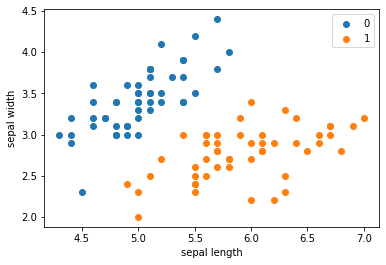

In [27]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'],label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'],label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [7]:
data = np.array(df.iloc[:100, [0,1,-1]])
X,y = data[:,:-1], data[:,-1]
y = np.array([1 if i==1 else -1 for i in y])

In [8]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1

    def sign(self, x, w, b):
        y = np.dot(x, w) + b     # np.dot()矩阵的乘法
        return y
    
    def fit(self, X_train, Y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for i in range(len(X_train)):
                x = X_train[i]
                y = Y_train[i]
                if y * self.sign(x, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, x)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'
    
    def score(self):
        pass

In [9]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

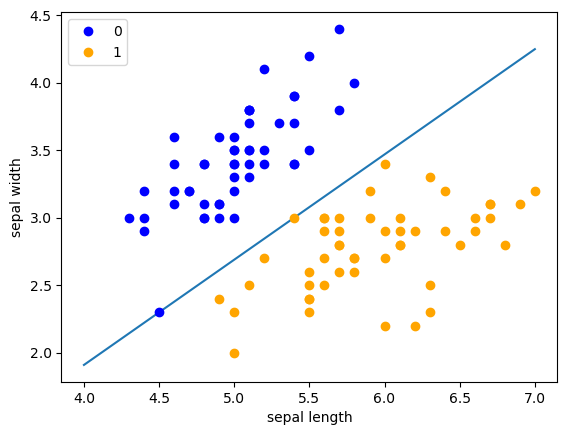

In [12]:
x0_points = np.linspace(4, 7, 10)
x1_points = -(perceptron.w[0] * x0_points + perceptron.b) / perceptron.w[1]   # w * x + b=0 ; w1X1+w2X2+b=0;X2=-(b+w1X1)/w2
plt.plot(x0_points, x1_points)

plt.plot(data[:50, 0], data[:50, 1], 'o', color='blue', label=0)
plt.plot(data[50:100, 0], data[50:100, 1], 'o', color='orange', label=1)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 2.6 scikit-learn实例

In [13]:
import sklearn
from sklearn.linear_model import Perceptron

In [14]:
sklearn.__version__

'1.1.2'

In [15]:
clf = Perceptron(fit_intercept=True,
                max_iter=1000,
                shuffle=True)
clf.fit(X,y)

Perceptron()

In [16]:
# Weights assigned to the features.
print(clf.coef_)

[[ 23.2 -38.7]]


In [17]:
# 截距 Constants in decision function.
print(clf.intercept_)

[-5.]


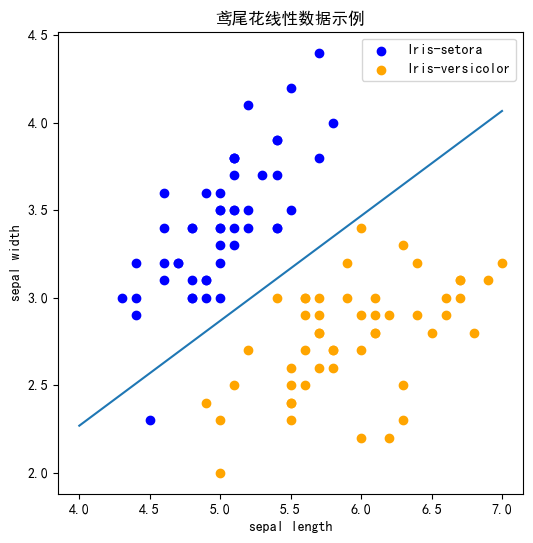

In [26]:
# 画布大小
plt.figure(figsize=(6,6))

# 中文标题
plt.rcParams["font.sans-serif"]=['SimHei']
plt.rcParams["axes.unicode_minus"] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50,0], data[:50,1], c='b', label='Iris-setora')
plt.scatter(data[50:100,0], data[50:100,1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_points = np.arange(4,8)
y_ = -(clf.coef_[0][0]*x_points + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_points, y_)

# 其他部分
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**注意 !**

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个`tol`参数。

`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：

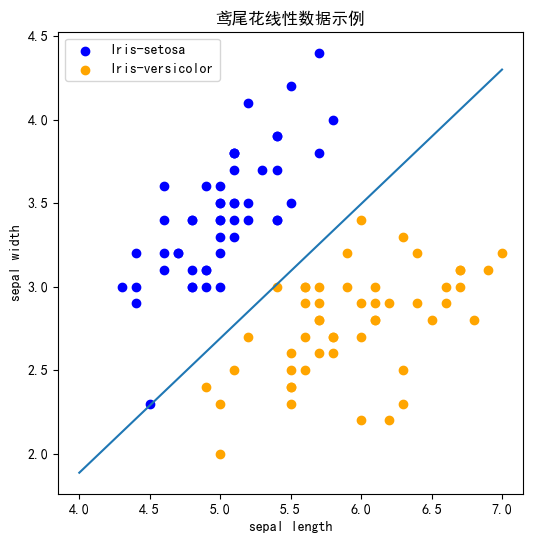

In [28]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)
clf.fit(X, y)

# 画布大小
plt.figure(figsize=(6,6))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()